# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# 1. Load Data
Loading and immediately shuffeling Data frame.
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
# Prediction Model developed by:
# Khurram Nazir
#  
#
import pandas as pd
import numpy as np
import seaborn as sns
#

import io
from google.colab import files

uploaded_file = files.upload()
#df = pd.read_csv("C:\Users\khurr\Documents\GitHub\AI-Engineering\PIAIC\Quarter-2\DeepLearning\compresive_strength_concrete.csv",sep=',')
df = pd.DataFrame(pd.read_csv(io.BytesIO(uploaded_file['compresive_strength_concrete.csv']),sep=','))

Saving compresive_strength_concrete.csv to compresive_strength_concrete.csv


In [2]:
df = df.sample(frac=1) #Shuffeling DF.
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
924,136.0,196.0,98.0,199.0,6.0,847.0,783.0,28,26.97
282,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
434,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,28,39.16
542,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
167,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91,74.19
...,...,...,...,...,...,...,...,...,...
810,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7,14.99
633,275.0,0.0,0.0,183.0,0.0,1088.0,808.0,7,14.20
22,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,3,8.06
994,374.3,0.0,0.0,190.2,6.7,1013.2,730.4,28,39.06


In [6]:
def df_lookslike(v_df):
    #---------------------------------------How dataframe looks like?
    v_df.info()
    print(v_df.head(5))
    total_cells=np.product(v_df.shape)
    num_col = [i for i in v_df.columns if (v_df[i].dtype=='int64' or v_df[i].dtype=='float64')]
    print(v_df[num_col].describe().loc[['min','max', 'mean','50%'],:]) #How big is Messy data?
    missing_Values=v_df.isnull().sum()
    print(missing_Values)
    total_missing=missing_Values.sum()

    #Percent of Missing data
    print("Percent of data is missing:",((total_missing/total_cells) * 100))

# 2. Check Missing Values
( If Exist ; Fill each record with mean of its feature )

I found there is NO missing/NULL data.

In [7]:
df_lookslike(df)# How DF looks like?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 924 to 154
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals) 

**Preparing Tensor & Feature Engineering**

We have all data in Float and Int form. There is no character data.
Hence No need to perform OneHotEncoding.

In [16]:
#Lets assign alias to columns.
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)":'Cement',
                               "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":'Bl_F_Slag',
                               "Fly Ash (component 3)(kg in a m^3 mixture)":'Fly_Ash', "Water  (component 4)(kg in a m^3 mixture)": 'Water',
                               "Superplasticizer (component 5)(kg in a m^3 mixture)":'S_plast',
                                "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":'Coarse_Agg',
                               "Fine Aggregate (component 7)(kg in a m^3 mixture)": 'Fine_Agg',
                                "Age (day)": "Age_day",
                        "Concrete_target ": 'Concrete_target',
                        "Concrete compressive strength(MPa, megapascals)":'Compressive_str'
                                
                               }, inplace=True )
df.head(5)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse-Aggregate,Fine_Aggregate,Age_day,"Concrete compressive strength(MPa, megapascals)"
924,136.0,196.0,98.0,199.0,6.0,847.0,783.0,28,26.97
282,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
434,178.0,129.8,118.6,179.9,3.6,1007.3,746.8,28,39.16
542,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
167,475.0,118.8,0.0,181.1,8.9,852.1,781.5,91,74.19


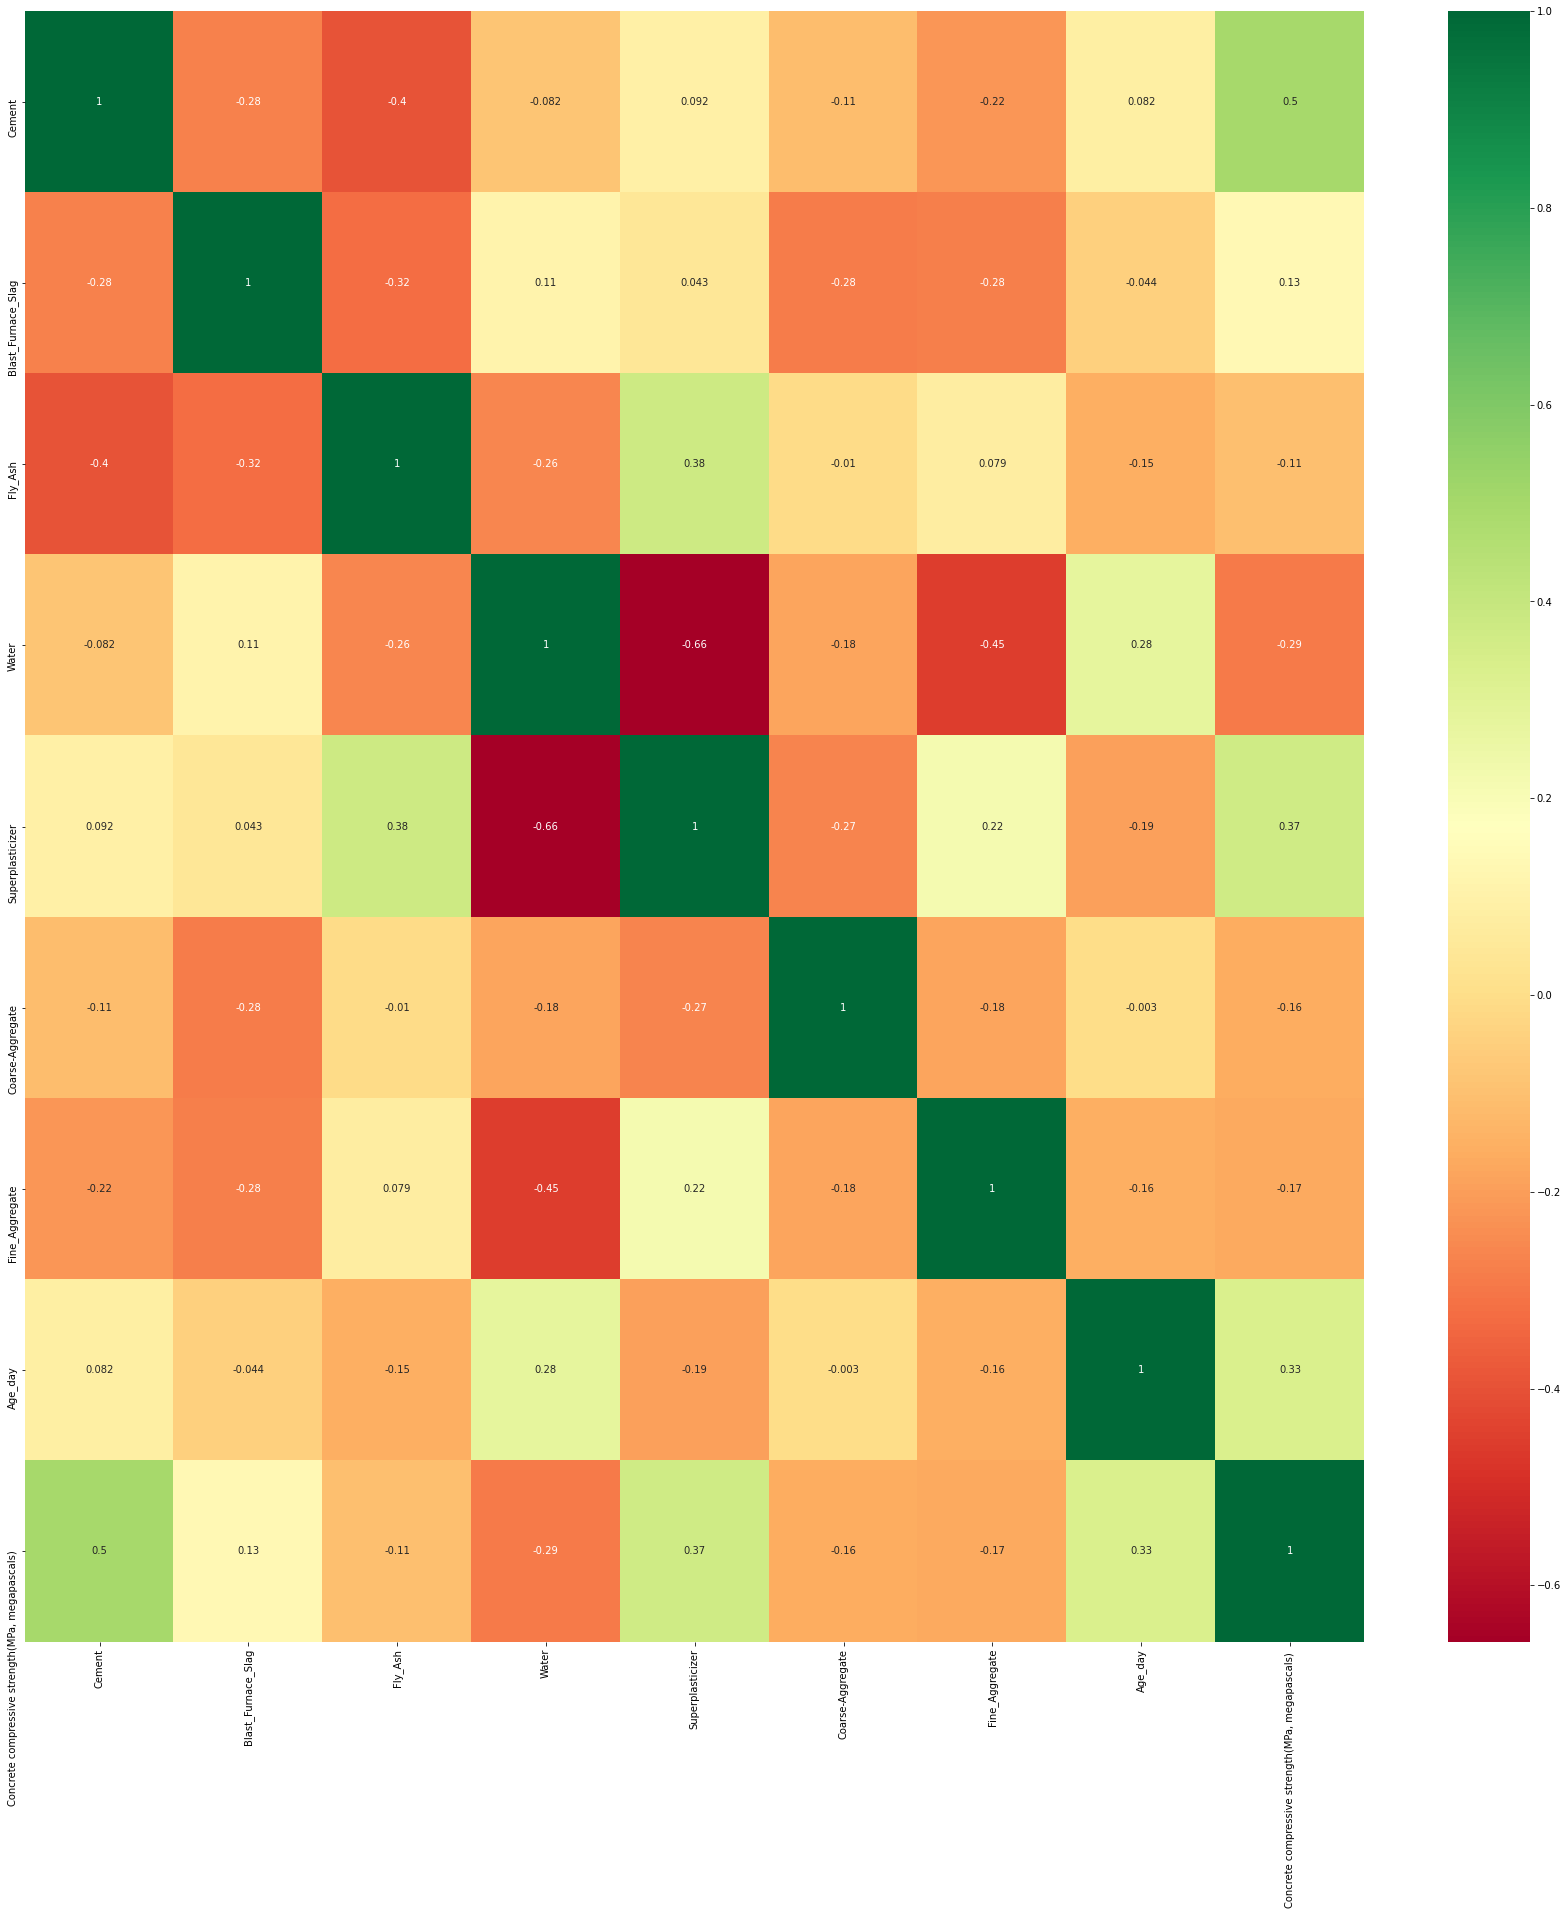

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr(method='pearson',min_periods=5) #pearson : standard correlation coefficient,
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")